In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Cooler Files

In [2]:
import higlass_jupyter as hiju
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'),   
        hgc.Track(track_type='heatmap', position='center',
                 tileset_uuid='CQMd6V_cRw6iCI_-Unl3PQ', 
                  api_url="http://higlass.io/api/v1/",
                  height=250,
                 options={ 'valueScaleMax': 0.5 }),

    ])
])

hiju.HiGlassDisplay(viewconf=conf.to_json())

track.position top
track.position center


HiGlassDisplay(viewconf={'editable': True, 'views': [{'uid': 'bOwG7zHqSBGgI20VpnMtiw', 'tracks': {'top': [{'ty…

In [18]:
import hgflask.tilesets as hfti
import hgflask.server as hgse

ts = hfti.cooler(
    '../data/Dixon2012-J1-NcoI-R1-filtered.100kb.multires.cool')

server = hgse.start(tilesets=[ts])

terminating: M3xEjaYVRSCnW-v47eZ2tw
sleeping


 * Running on http://0.0.0.0:49686/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [29/Oct/2018 10:33:17] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "error": "No such tileset with uid: a"\n  }\n}\n'
returning


127.0.0.1 - - [29/Oct/2018 10:33:36] "GET /api/v1/tileset_info/?d=Zjk7gt9ERdCxLb_yZd81nw HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:36:18] "OPTIONS /api/v1/tileset_info/?d=Zjk7gt9ERdCxLb_yZd81nw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:36:19] "GET /api/v1/tileset_info/?d=Zjk7gt9ERdCxLb_yZd81nw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:36:19] "OPTIONS /api/v1/tiles/?d=Zjk7gt9ERdCxLb_yZd81nw.7.0.0&d=Zjk7gt9ERdCxLb_yZd81nw.2.0.1&d=Zjk7gt9ERdCxLb_yZd81nw.2.0.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.1&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.2.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.3&d=Zjk7gt9ERdCxLb_yZd81nw.2.2.3&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:36:20] "GET /api/v1/tiles/?d=Zjk7gt9ERdCxLb_yZd81nw.7.0.0&d=Zjk7gt9ERdCxLb_yZd81nw.2.0.1&d=Zjk7gt9ERdCxLb_yZd81nw.2.0.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.1&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.2.2&d=Zjk7gt9ERdCxLb_yZd81nw.2.1.3&d=Zjk7g

In [19]:
server.tileset_info(ts.uuid)

{'bins_per_dimension': 256,
 'chromsizes': [['chr1', 197195432],
  ['chr2', 181748087],
  ['chr3', 159599783],
  ['chr4', 155630120],
  ['chr5', 152537259],
  ['chr6', 149517037],
  ['chr7', 152524553],
  ['chr8', 131738871],
  ['chr9', 124076172],
  ['chr10', 129993255],
  ['chr11', 121843856],
  ['chr12', 121257530],
  ['chr13', 120284312],
  ['chr14', 125194864],
  ['chr15', 103494974],
  ['chr16', 98319150],
  ['chr17', 95272651],
  ['chr18', 90772031],
  ['chr19', 61342430],
  ['chrX', 166650296],
  ['chrY', 15902555],
  ['chrM', 16299]],
 'max_pos': [2654911517, 2654911517],
 'max_width': 3276800000,
 'max_zoom': 7,
 'min_pos': [0, 0],
 'transforms': [{'name': 'ICE', 'value': 'weight'}]}

In [22]:
server.api_address

'http://localhost:49686/api/v1'

In [23]:
import higlass_jupyter as hiju
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'),   
        hgc.Track(track_type='heatmap', position='center',
                 tileset_uuid=ts.uuid, 
                  api_url=server.api_address,
                  height=250,
                 options={ 'valueScaleMax': 0.5 }),

    ])
])

hiju.HiGlassDisplay(viewconf=conf.to_json())

track.position top
track.position center


A Jupyter Widget

## BigWig Files

In [24]:
import hgtiles.chromsizes as hgch

import hgflask.server as hgse
import hgflask.tilesets as hfti


chromsizes_fp = '../data/chromSizes_hg19_reordered.tsv'
bigwig_fp = '../data/wgEncodeCaltechRnaSeqHuvecR1x75dTh1014IlnaPlusSignalRep2.bigWig'

chromsizes = hgch.get_tsv_chromsizes(chromsizes_fp)

ts_r = hfti.bigwig(bigwig_fp, chromsizes=chromsizes)
cs_r = hfti.chromsizes(chromsizes_fp)
remote_file = hfti.bigwig('http://hgdownload.cse.ucsc.edu/goldenpath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878InputStdSig.bigWig')

server = hgse.start(tilesets=[ts_r, cs_r, remote_file])

terminating: SRRAoR6dRUiLW4bFxhYslA


 * Running on http://0.0.0.0:50913/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [29/Oct/2018 10:38:03] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "error": "No such tileset with uid: a"\n  }\n}\n'
returning


127.0.0.1 - - [29/Oct/2018 10:38:26] "GET /api/v1/tiles/?d=U5dt2qg9RbefsW8bgZtj_w.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:33] "OPTIONS /api/v1/tileset_info/?d=HiqXxYF9Rk6JeaB5U86v8Q&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:33] "GET /api/v1/chrom-sizes/?id=I811zO85TpmAgaq3saDiJA HTTP/1.1" 200 -


hi


127.0.0.1 - - [29/Oct/2018 10:38:34] "GET /api/v1/tileset_info/?d=HiqXxYF9Rk6JeaB5U86v8Q&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:34] "OPTIONS /api/v1/tiles/?d=HiqXxYF9Rk6JeaB5U86v8Q.22.0&d=HiqXxYF9Rk6JeaB5U86v8Q.0.0&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:34] "GET /api/v1/tiles/?d=HiqXxYF9Rk6JeaB5U86v8Q.22.0&d=HiqXxYF9Rk6JeaB5U86v8Q.0.0&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:37] "OPTIONS /api/v1/tiles/?d=HiqXxYF9Rk6JeaB5U86v8Q.1.0&d=HiqXxYF9Rk6JeaB5U86v8Q.1.1&d=HiqXxYF9Rk6JeaB5U86v8Q.2.1&d=HiqXxYF9Rk6JeaB5U86v8Q.2.2&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:37] "GET /api/v1/tiles/?d=HiqXxYF9Rk6JeaB5U86v8Q.1.0&d=HiqXxYF9Rk6JeaB5U86v8Q.1.1&d=HiqXxYF9Rk6JeaB5U86v8Q.2.1&d=HiqXxYF9Rk6JeaB5U86v8Q.2.2&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:38:37] "OPTIONS /api/v1/tiles/?d=HiqXxYF9Rk6JeaB5U86v8Q.3.2&d=HiqXxYF9Rk6JeaB5U86v8Q.3.3&s

In [25]:
%%time 
server.tiles(remote_file.uuid, 0, 0)

CPU times: user 5.66 ms, sys: 3.5 ms, total: 9.16 ms
Wall time: 8.79 s


{'dense': 'Rh25PwcCcz+w+bA/HS6MPzbKlD8fw6c/CMrEPw9knT9N2ZA/oMOnP0cmoz+eLIQ/QBeJP2QAcz+dT24/Mf5tP3SLaz/QhC8/QINdP8xZNj82Vnc/G/J8P+8UjT/+7T4/fgRwPxOxLz/khaA/5q6FP98Yfj/A5xFBAADAfwAAwH8AAMB/AADAf+tlB0D5/ZU/F5ydP5zCwD+tPKA/WcFZP4BcjD+wboU/tyBuP80Bjj/Esog/JJkiP22VSD9WxV0/LMuTP3S8qD/wWoE/8WGEPyeqTj9deoI/n0OOP5hSgD9oqZw/394oPyEObT92OVY/8YBXP+UglT/GFVA/cDhvP0alcD9Nh50/POKBP2waVz87f4E/XkmZPwrphT/g8i0/p8h0P7cUkz9o7JU/D+iNP7QLjT+EgzA/0FcnP3BciD/2buU/AlqnP8Gvmz/saF8/uUhbP/NFjz9bc1g/aqFjP9NGRj/3IH4/SSWWP+Efgj/yHjs/IgdnP8K1aj9+MWE/pnRZP2zreD+dATU/wbx9P8R5kT/aO3s/UZtmPwzaRz//Y3Y/75A+P2bwgj+0foY/Rll8P6vLQz8QfYM/6Ip7P4kQdz8slV0/vGyrPzRFYj/LtU4/E75wPzX2iD8zyKA/M+uAP6EKWD8bX1M/ZxOAP0HsXz+234E/peyJP5xfsj9hf54/fv9vP7UofD9LzUY/LS1gP9uZez9kGS0/K/ErP45EED+RHDU/lW8vPwATTD9sOnc/xRhdP8m4TT99ZI4/JRt2Px+Jjj97b5A/DV6HP4knfT8AU3Y/vViJP3N8Mj9/Uow/bYppP2MObz8XxhY/A3o4P8ngkT/xA0I/rYd/P6d8iD8D244/2NFqP+Z2mz8rCoA/8TxeP7ADWT9i9Tk/IFAuP0xbYD+L2RM/Jpk7PxkVrj+naEs/04iWP+FmbD/7yWk/510YP6vVGT96eEQ/NtFbP9oIhz9mgVs/SBtlP6sKaT9Fb

In [26]:
import higlass_jupyter as hiju
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'),
        
        hgc.Track(track_type='horizontal-chromosome-labels', position='top',
                 tileset_uuid=cs_r.uuid, api_url=server.api_address),
        hgc.Track(track_type='horizontal-bar', position='top', 
                  tileset_uuid=ts_r.uuid, api_url=server.api_address,
                 options={ 'height': 40 }),
    ])
])

hiju.HiGlassDisplay(viewconf=conf.to_json())

track.position top
track.position top
track.position top


A Jupyter Widget

In [8]:
import hgtiles.bigwig as hgbi
import hgtiles.chromsizes as hgch

import hgflask.server as hgse
import hgflask.tilesets as hfti

chromsizes_fp = '../data/chromSizes_hg19_reordered.tsv'
chromsizes = hgch.get_tsv_chromsizes(chromsizes_fp)
bigwig_fp = '../data/wgEncodeCaltechRnaSeqHuvecR1x75dTh1014IlnaPlusSignalRep2.bigWig'

#print("chromsizes:", chromsizes)
#print("hgbi.tileset_info", hgbi.tileset_info(bigwig_fp, chromsizes))

ts = hfti.Tileset(tileset_info=lambda: hgbi.tileset_info(bigwig_fp),
                tiles=lambda tids: hgbi.tiles(bigwig_fp, tids))
ts_r = hfti.Tileset(tileset_info=lambda: hgbi.tileset_info(bigwig_fp, chromsizes),
                tiles=lambda tids: hgbi.tiles(bigwig_fp, tids, chromsizes=chromsizes))

cs = hfti.Tileset(chromsizes=lambda: 
                   hgch.get_tsv_chromsizes('../data/chromSizes_hg19.tsv'))
cs_r = hfti.Tileset(chromsizes=lambda: 
                   hgch.get_tsv_chromsizes('../data/chromSizes_hg19_reordered.tsv'))

server = hgse.start(tilesets=[ts, ts_r, cs, cs_r])

terminating: H6iddu2_RJWDUK4hxO6I2g


 * Running on http://0.0.0.0:58870/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [28/Oct/2018 18:12:34] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "error": "No such tileset with uid: a"\n  }\n}\n'
returning


127.0.0.1 - - [28/Oct/2018 18:12:40] "GET /api/v1/chrom-sizes/?id=WpUeoTMNSKOVJvwV3y-eWg HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:40] "OPTIONS /api/v1/tileset_info/?d=JCCA05KgR9KpwY8i8iOAlA&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:40] "GET /api/v1/chrom-sizes/?id=BOtWcxOSQX6yJFCeNASoKg HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:40] "OPTIONS /api/v1/tileset_info/?d=N0Vw4qL2TcWSNfHfTmsugw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -


hi
hi


127.0.0.1 - - [28/Oct/2018 18:12:40] "GET /api/v1/tileset_info/?d=JCCA05KgR9KpwY8i8iOAlA&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:40] "GET /api/v1/tileset_info/?d=N0Vw4qL2TcWSNfHfTmsugw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:41] "OPTIONS /api/v1/tiles/?d=JCCA05KgR9KpwY8i8iOAlA.22.0&d=N0Vw4qL2TcWSNfHfTmsugw.22.0&d=JCCA05KgR9KpwY8i8iOAlA.0.0&d=N0Vw4qL2TcWSNfHfTmsugw.0.0&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:41] "GET /api/v1/tiles/?d=JCCA05KgR9KpwY8i8iOAlA.22.0&d=N0Vw4qL2TcWSNfHfTmsugw.22.0&d=JCCA05KgR9KpwY8i8iOAlA.0.0&d=N0Vw4qL2TcWSNfHfTmsugw.0.0&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:43] "OPTIONS /api/v1/tiles/?d=JCCA05KgR9KpwY8i8iOAlA.1.0&d=JCCA05KgR9KpwY8i8iOAlA.1.1&d=N0Vw4qL2TcWSNfHfTmsugw.1.0&d=N0Vw4qL2TcWSNfHfTmsugw.1.1&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2018 18:12:44] "GET /api/v1/tiles/?d=JCCA05KgR9KpwY8i8iOAlA.1.0&

In [9]:
import json
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'),
        
        hgc.Track(track_type='horizontal-chromosome-labels', position='top',
                 tileset_uuid=cs.uuid, api_url=server.api_address),
        hgc.Track(track_type='horizontal-bar', position='top', 
                  tileset_uuid=ts.uuid, api_url=server.api_address),
        
        hgc.Track(track_type='horizontal-chromosome-labels', position='top',
                 tileset_uuid=cs_r.uuid, api_url=server.api_address),
        hgc.Track(track_type='horizontal-bar', position='top', 
                  tileset_uuid=ts_r.uuid, api_url=server.api_address),
    ])
])

print(json.dumps(conf.to_json()))

import higlass_jupyter as hiju

hiju.HiGlassDisplay(viewconf=conf.to_json())

track.position top
track.position top
track.position top
track.position top
track.position top
{"editable": true, "views": [{"uid": "RWQwKsn6RjSG-1O3JULGnw", "tracks": {"top": [{"type": "top-axis", "options": {}}, {"type": "horizontal-chromosome-labels", "options": {}, "server": "http://localhost:58870/api/v1", "tilesetUid": "WpUeoTMNSKOVJvwV3y-eWg"}, {"type": "horizontal-bar", "options": {}, "server": "http://localhost:58870/api/v1", "tilesetUid": "JCCA05KgR9KpwY8i8iOAlA"}, {"type": "horizontal-chromosome-labels", "options": {}, "server": "http://localhost:58870/api/v1", "tilesetUid": "BOtWcxOSQX6yJFCeNASoKg"}, {"type": "horizontal-bar", "options": {}, "server": "http://localhost:58870/api/v1", "tilesetUid": "N0Vw4qL2TcWSNfHfTmsugw"}], "center": [], "left": [], "right": [], "bottom": []}, "layout": {"w": 12, "h": 6, "x": 0, "y": 0}}], "trackSourceServers": ["http://higlass.io/api/v1"], "exportViewUrl": "http://higlass.io/api/v1/viewconfs"}
track.position top
track.position top
track.p

A Jupyter Widget

## Custom Data

In [10]:
import math
import numpy as np
import itertools as it

dim = 2000

data = np.zeros((dim, dim))
for x,y in it.product(range(dim), repeat=2):
    data[x][y] = (-(y + 47) * math.sin(math.sqrt(abs(x / 2 + (y+47))))
                             - x * math.sin(math.sqrt(abs(x - (y+47)))))

In [27]:
import functools as ft
import hgtiles.npmatrix as hgnp

import hgflask.server as hgse
import hgflask.tilesets as hfti

ts = hfti.Tileset(
    tileset_info=lambda: hgnp.tileset_info(data),
    tiles=lambda tids: hgnp.tiles_wrapper(data, tids)
)

server = hgse.start([ts])

terminating: GQ7SqYuPTnmH_GHdNkUGZw


 * Running on http://0.0.0.0:51904/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [29/Oct/2018 10:41:23] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "error": "No such tileset with uid: a"\n  }\n}\n'
returning


127.0.0.1 - - [29/Oct/2018 10:41:25] "OPTIONS /api/v1/tileset_info/?d=QwOKjhYmTjGsLT6872kfcw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:41:25] "GET /api/v1/tileset_info/?d=QwOKjhYmTjGsLT6872kfcw&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:41:25] "OPTIONS /api/v1/tiles/?d=QwOKjhYmTjGsLT6872kfcw.3.0.0&d=QwOKjhYmTjGsLT6872kfcw.2.0.1&d=QwOKjhYmTjGsLT6872kfcw.2.0.2&d=QwOKjhYmTjGsLT6872kfcw.2.1.1&d=QwOKjhYmTjGsLT6872kfcw.2.1.2&d=QwOKjhYmTjGsLT6872kfcw.2.2.1&d=QwOKjhYmTjGsLT6872kfcw.2.2.2&d=QwOKjhYmTjGsLT6872kfcw.2.3.1&d=QwOKjhYmTjGsLT6872kfcw.2.3.2&s=F50j-p65Tg2KMiM0e_T0PQ HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2018 10:41:25] "GET /api/v1/tiles/?d=QwOKjhYmTjGsLT6872kfcw.3.0.0&d=QwOKjhYmTjGsLT6872kfcw.2.0.1&d=QwOKjhYmTjGsLT6872kfcw.2.0.2&d=QwOKjhYmTjGsLT6872kfcw.2.1.1&d=QwOKjhYmTjGsLT6872kfcw.2.1.2&d=QwOKjhYmTjGsLT6872kfcw.2.2.1&d=QwOKjhYmTjGsLT6872kfcw.2.2.2&d=QwOKjhYmTjGsLT6872kfcw.2.3.1&d=QwOKjhYmTjGsLT6872kfcw.2.3.2&s=F50j-p65Tg2KMiM0e

In [28]:
import higlass_jupyter as hiju
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'), 
        hgc.Track(track_type='left-axis', position='left'),
        hgc.Track(track_type='heatmap', position='center',
                 tileset_uuid=ts.uuid, 
                  api_url=server.api_address,
                  height=100,
                 options={ 'valueScaleMax': 0.5 }),

    ])
])

hiju.HiGlassDisplay(viewconf=conf.to_json())

track.position top
track.position left
track.position center


A Jupyter Widget

## Many Points

In [23]:
import hgtiles.points as hgpo
import hgtiles.utils as hgut

import hgflask.server as hfse
import hgflask.tilesets as hfti

import numpy as np
import pandas as pd

length = int(1e6)
df = pd.DataFrame({
    'x': np.random.random((length,)),
    'y': np.random.random((length,)),
    'v': range(1, length+1),
})

# get the tileset info (bounds and such) of the dataset
tsinfo = hgpo.tileset_info(df, 'x', 'y')

ts = hfti.Tileset(
    tileset_info=lambda: tsinfo,
    tiles=lambda tile_ids: hgpo.format_data(
                hgut.bundled_tiles_wrapper_2d(tile_ids,
                    lambda z,x,y,width=1,height=1: hgpo.tiles(df, 'x', 'y',
                        tsinfo, z, x, y, width, height))))

# start the server
server = hfse.start([ts])

TypeError: reduce() takes at most 5 arguments (6 given)

In [24]:
%%javascript

require(["https://unpkg.com/higlass-labelled-points-track@0.1.7/dist/higlass-labelled-points-track"],
    function(hglib) {

});

<IPython.core.display.Javascript object>

In [31]:
import hgflask.client as hfc
import higlass_jupyter as hiju

hgc = hfc.ViewConf([
    hfc.View([
        hfc.Track(
            track_type='labelled-points-track',
            position='center',
            tileset_uuid=ts.uuid,
            api_url=server.api_address,
            height=200,
            options={
                'labelField': 'v'
            })
    ])
])

hiju.HiGlassDisplay(viewconf=hgc.to_json())

track.position center


A Jupyter Widget

## Multires matrices

In [2]:
import os
os.stat('../data/int_matrices.hdf5')

os.stat_result(st_mode=33188, st_ino=8608050079, st_dev=16777220, st_nlink=1, st_uid=501, st_gid=20, st_size=8905545, st_atime=1541892061, st_mtime=1541892045, st_ctime=1541892045)

In [30]:
import h5py
import hgtiles.mrmatrix as hgmm
import hgtiles.format as hgfo
import hgtiles.utils as hgut
import hgflask.tilesets as hfti
import hgflask.server as hgse

f = h5py.File('../data/int_matrices.hdf5', 'r')
t = hgmm.tiles(f, 0, 0, 0)

ts = hfti.Tileset(
    tileset_info=lambda: hgmm.tileset_info(f),
    tiles=lambda tile_ids: hgut.tiles_wrapper_2d(tile_ids,
                    lambda z,x,y: hgfo.format_dense_tile(
                        hgmm.tiles(f, z, x, y)))
    )

server = hgse.start([ts])

attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 256
mat: (256, 256)
data: [[             nan              nan              nan ... 1934815.87980584
  1934815.87980584              nan]
 [             nan              nan              nan ...              nan
               nan              nan]
 [             nan              nan              nan ...              nan
               nan              nan]
 ...
 [             nan              nan              nan ... 1934815.87980584
  1934815.87980584              nan]
 [             nan              nan              nan ... 1934815.87980584
  1934815.87980584              nan]
 [             nan              nan              nan ... 1934815.87980584
  1934815.87980584              nan]]
x_pad: 0
y_pad 0
terminating: OkJPPE9YTw2pBVzcGh6H0A
 * Serving Flask app "hgflask.server" (lazy loading)
 * Environment: production
   Use a production WSGI serve

 * Running on http://0.0.0.0:49503/ (Press CTRL+C to quit)


sleeping


127.0.0.1 - - [10/Nov/2018 15:53:20] "GET /api/v1/tileset_info/?d=a HTTP/1.1" 200 -


ret: 200 b'{\n  "a": {\n    "error": "No such tileset with uid: a"\n  }\n}\n'
returning


127.0.0.1 - - [10/Nov/2018 15:53:26] "OPTIONS /api/v1/tileset_info/?d=MBtD2N-ESNaxOBKlpF63pg&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:26] "GET /api/v1/tileset_info/?d=MBtD2N-ESNaxOBKlpF63pg&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:26] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.5&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.5&d=MBtD2N-ESNaxOBKlpF63pg.3.6.4&d=MBtD2N-ESNaxOBKlpF63pg.3.6.5&d=MBtD2N-ESNaxOBKlpF63pg.1.0.0&d=MBtD2N-ESNaxOBKlpF63pg.1.0.1&d=MBtD2N-ESNaxOBKlpF63pg.1.1.0&d=MBtD2N-ESNaxOBKlpF63pg.1.1.1&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 1024 tile_x_end: 1280
tile_y_start: 1024 tile_y_end: 1280
mat: (2048, 2048)
data: [[1934815.87980584 1934815.87980584 1934815.87980584 ...    3861.66342509
     3861.66342509    3861.66342509]
 [1934815.87980584 1934815.87980584 1934815.87980584 ...    3861.66342509
     3861.66342509    3861.66342509]
 [1934815.87980584 1934815.87980584 1934815.87980584 ...    3861.66342509
     3861.66342509    3861.66342509]
 ...
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 1024 tile_x_end: 1280
tile_y_start: 1024 ti

127.0.0.1 - - [10/Nov/2018 15:53:27] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.5&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.5&d=MBtD2N-ESNaxOBKlpF63pg.3.6.4&d=MBtD2N-ESNaxOBKlpF63pg.3.6.5&d=MBtD2N-ESNaxOBKlpF63pg.1.0.0&d=MBtD2N-ESNaxOBKlpF63pg.1.0.1&d=MBtD2N-ESNaxOBKlpF63pg.1.1.0&d=MBtD2N-ESNaxOBKlpF63pg.1.1.1&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:36] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.3&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.2&d=MBtD2N-ESNaxOBKlpF63pg.3.5.3&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 768 tile_x_end: 1024
tile_y_start: 768 tile_y_end: 1024
mat: (2048, 2048)
data: [[  7575.10469318   7575.10469318   7575.10469318 ...   2595.56689467
    1823.95149248   1454.76610795]
 [  7575.10469318   7575.10469318   7575.10469318 ...   5108.03993278
    3581.98067606   2879.50835756]
 [  7575.10469318   7575.10469318   7575.10469318 ...   8351.32559353
    3729.42054377   5255.67534006]
 ...
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 1024 tile_x_end: 1280
tile_y_start: 1024 tile_y_end: 1280
mat: (2048, 2048)
data:

127.0.0.1 - - [10/Nov/2018 15:53:36] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.3&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.2&d=MBtD2N-ESNaxOBKlpF63pg.3.5.3&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:53] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.2&d=MBtD2N-ESNaxOBKlpF63pg.3.5.3&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[1.55942588e+03 2.29547114e+02 1.27145128e+03 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [6.24980062e+02 1.25072374e+03 7.14379208e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [3.22826277e+02 1.09966485e+03 5.08157069e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 ...
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[  1405.10925734   1405.10925734   1405.

127.0.0.1 - - [10/Nov/2018 15:53:54] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&d=MBtD2N-ESNaxOBKlpF63pg.3.5.2&d=MBtD2N-ESNaxOBKlpF63pg.3.5.3&d=MBtD2N-ESNaxOBKlpF63pg.3.5.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:54] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.1&d=MBtD2N-ESNaxOBKlpF63pg.2.0.2&d=MBtD2N-ESNaxOBKlpF63pg.2.1.1&d=MBtD2N-ESNaxOBKlpF63pg.2.1.2&d=MBtD2N-ESNaxOBKlpF63pg.2.2.1&d=MBtD2N-ESNaxOBKlpF63pg.2.2.2&d=MBtD2N-ESNaxOBKlpF63pg.2.3.1&d=MBtD2N-ESNaxOBKlpF63pg.2.3.2&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (1024, 1024)
data: [[ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 [ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 [ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 ...
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 768 tile_x_end: 1024
tile_y_start: 768 tile_y_end: 1024
mat: (1024, 1024)
data: [[10997.84439155 10997.84439155 10997.8

127.0.0.1 - - [10/Nov/2018 15:53:55] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.1&d=MBtD2N-ESNaxOBKlpF63pg.2.0.2&d=MBtD2N-ESNaxOBKlpF63pg.2.1.1&d=MBtD2N-ESNaxOBKlpF63pg.2.1.2&d=MBtD2N-ESNaxOBKlpF63pg.2.2.1&d=MBtD2N-ESNaxOBKlpF63pg.2.2.2&d=MBtD2N-ESNaxOBKlpF63pg.2.3.1&d=MBtD2N-ESNaxOBKlpF63pg.2.3.2&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:58] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.3&d=MBtD2N-ESNaxOBKlpF63pg.2.1.3&d=MBtD2N-ESNaxOBKlpF63pg.2.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (1024, 1024)
data: [[1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 ...
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 2

127.0.0.1 - - [10/Nov/2018 15:53:58] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.3&d=MBtD2N-ESNaxOBKlpF63pg.2.1.3&d=MBtD2N-ESNaxOBKlpF63pg.2.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:53:59] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.1.0&d=MBtD2N-ESNaxOBKlpF63pg.2.2.0&d=MBtD2N-ESNaxOBKlpF63pg.2.3.0&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (1024, 1024)
data: [[1934815.87980584 1934815.87980584 1934815.87980584 ... 1934815.87980584
  1934815.87980584 1934815.87980584]
 [ 342317.41874256  342317.41874256  342317.41874256 ...              nan
               nan              nan]
 [ 342317.41874256  342317.41874256  342317.41874256 ...              nan
               nan              nan]
 ...
 [   7349.58890174    7349.58890174    7349.58890174 ...              nan
               nan              nan]
 [   7349.58890174    7349.58890174    7349.58890174 ...              nan
               nan              nan]
 [   7349.58890174    7349.58890174    7349.58890174 ...              nan
               nan              nan]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 256 tile_x_end: 512
tile_y_start: 256 tile_y_en

127.0.0.1 - - [10/Nov/2018 15:53:59] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.1.0&d=MBtD2N-ESNaxOBKlpF63pg.2.2.0&d=MBtD2N-ESNaxOBKlpF63pg.2.3.0&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:54:01] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.4.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 768 tile_x_end: 1024
tile_y_start: 768 tile_y_end: 1024
mat: (2048, 2048)
data: [[  7575.10469318   7575.10469318   7575.10469318 ...   2595.56689467
    1823.95149248   1454.76610795]
 [  7575.10469318   7575.10469318   7575.10469318 ...   5108.03993278
    3581.98067606   2879.50835756]
 [  7575.10469318   7575.10469318   7575.10469318 ...   8351.32559353
    3729.42054377   5255.67534006]
 ...
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]
 [690915.34836972 690915.34836972 690915.34836972 ...  10580.40711458
   10580.40711458  10580.40711458]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 1024 tile_x_end: 1280
tile_y_start: 1024 tile_y_end: 1280
mat: (2048, 2048)
data:

127.0.0.1 - - [10/Nov/2018 15:54:01] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.4.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:56:47] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[1.55942588e+03 2.29547114e+02 1.27145128e+03 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [6.24980062e+02 1.25072374e+03 7.14379208e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [3.22826277e+02 1.09966485e+03 5.08157069e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 ...
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[  1405.10925734   1405.10925734   1405.

127.0.0.1 - - [10/Nov/2018 15:56:47] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&d=MBtD2N-ESNaxOBKlpF63pg.3.4.2&d=MBtD2N-ESNaxOBKlpF63pg.3.4.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:56:48] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.0&d=MBtD2N-ESNaxOBKlpF63pg.2.0.1&d=MBtD2N-ESNaxOBKlpF63pg.2.0.2&d=MBtD2N-ESNaxOBKlpF63pg.2.1.0&d=MBtD2N-ESNaxOBKlpF63pg.2.1.1&d=MBtD2N-ESNaxOBKlpF63pg.2.1.2&d=MBtD2N-ESNaxOBKlpF63pg.2.2.0&d=MBtD2N-ESNaxOBKlpF63pg.2.2.1&d=MBtD2N-ESNaxOBKlpF63pg.2.2.2&d=MBtD2N-ESNaxOBKlpF63pg.1.0.0&d=MBtD2N-ESNaxOBKlpF63pg.1.0.1&d=MBtD2N-ESNaxOBKlpF63pg.1.1.0&d=MBtD2N-ESNaxOBKlpF63pg.1.1.1&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (1024, 1024)
data: [[ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 [ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 [ 4186.35623873  4186.35623873  4186.35623873 ...            nan
             nan            nan]
 ...
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]
 [26027.61741004 26027.61741004 26027.61741004 ...  1400.26366179
   1400.26366179  1400.26366179]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (1024, 1024)
data: [[1934815.87980584 1934815.87980584 19348

     3864.88048745   13201.49486231]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 256
mat: (1024, 1024)
data: [[            nan             nan             nan ...             nan
  222415.87760777 222415.87760777]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 ...
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]
 [            nan             nan             nan ...             nan
              nan             nan]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 

127.0.0.1 - - [10/Nov/2018 15:56:48] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.2.0.0&d=MBtD2N-ESNaxOBKlpF63pg.2.0.1&d=MBtD2N-ESNaxOBKlpF63pg.2.0.2&d=MBtD2N-ESNaxOBKlpF63pg.2.1.0&d=MBtD2N-ESNaxOBKlpF63pg.2.1.1&d=MBtD2N-ESNaxOBKlpF63pg.2.1.2&d=MBtD2N-ESNaxOBKlpF63pg.2.2.0&d=MBtD2N-ESNaxOBKlpF63pg.2.2.1&d=MBtD2N-ESNaxOBKlpF63pg.2.2.2&d=MBtD2N-ESNaxOBKlpF63pg.1.0.0&d=MBtD2N-ESNaxOBKlpF63pg.1.0.1&d=MBtD2N-ESNaxOBKlpF63pg.1.1.0&d=MBtD2N-ESNaxOBKlpF63pg.1.1.1&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:56:53] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.1.2&d=MBtD2N-ESNaxOBKlpF63pg.3.1.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[1.55942588e+03 2.29547114e+02 1.27145128e+03 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [6.24980062e+02 1.25072374e+03 7.14379208e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [3.22826277e+02 1.09966485e+03 5.08157069e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 ...
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 256 tile_x_end: 512
tile_y_start: 256 tile_y_end: 512
mat: (2048, 2048)
data: [[ 1209.50947217  1209.50947217  1209.509

127.0.0.1 - - [10/Nov/2018 15:56:53] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.1.2&d=MBtD2N-ESNaxOBKlpF63pg.3.1.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:56:53] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.2&d=MBtD2N-ESNaxOBKlpF63pg.3.0.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 256
mat: (2048, 2048)
data: [[ 11564.07745679  11564.07745679   4384.74880372 ...  75356.0614386
   88155.63598555  89190.73449676]
 [ 11564.07745679  11564.07745679  11564.07745679 ...  79555.41266613
   84741.641455    92225.43285235]
 [ 13797.59558187  13797.59558187  15003.86226029 ...  79131.27554031
   86891.54362715  92465.0246473 ]
 ...
 [201002.56572043 201002.56572043 201002.56572043 ...   1742.17197253
    1742.17197253   1742.17197253]
 [201002.56572043 201002.56572043 201002.56572043 ...   1742.17197253
    1742.17197253   1742.17197253]
 [201002.56572043 201002.56572043 201002.56572043 ...   1742.17197253
    1742.17197253   1742.17197253]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 256
mat: (2048, 2048)
data: [[           n

127.0.0.1 - - [10/Nov/2018 15:56:54] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.2&d=MBtD2N-ESNaxOBKlpF63pg.3.0.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:57:00] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.2&d=MBtD2N-ESNaxOBKlpF63pg.3.0.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[1.55942588e+03 2.29547114e+02 1.27145128e+03 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [6.24980062e+02 1.25072374e+03 7.14379208e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 [3.22826277e+02 1.09966485e+03 5.08157069e+02 ... 6.90915348e+05
  6.90915348e+05 6.90915348e+05]
 ...
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]
 [5.66524409e+05 5.66524409e+05 5.66524409e+05 ... 2.72400017e+04
  2.72400017e+04 2.72400017e+04]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 0 tile_x_end: 256
tile_y_start: 0 tile_y_end: 256
mat: (2048, 2048)
data: [[ 11564.07745679  11564.07745679   4384.7488

127.0.0.1 - - [10/Nov/2018 15:57:01] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.2&d=MBtD2N-ESNaxOBKlpF63pg.3.0.3&d=MBtD2N-ESNaxOBKlpF63pg.3.2.2&d=MBtD2N-ESNaxOBKlpF63pg.3.2.3&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -
127.0.0.1 - - [10/Nov/2018 15:57:01] "OPTIONS /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.1&d=MBtD2N-ESNaxOBKlpF63pg.3.0.4&d=MBtD2N-ESNaxOBKlpF63pg.3.1.1&d=MBtD2N-ESNaxOBKlpF63pg.3.1.4&d=MBtD2N-ESNaxOBKlpF63pg.3.2.1&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.1&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 512 tile_x_end: 768
tile_y_start: 512 tile_y_end: 768
mat: (2048, 2048)
data: [[133842.46228266 132685.00181511 128931.0691126  ... 652372.65990389
  658590.71540315 660825.36171139]
 [138730.56046416 135295.56180781 132078.09153117 ... 652180.56559373
  654263.68547002 657538.17412874]
 [141201.91095875 142182.48482072 136679.67026603 ... 648156.08371088
  651324.99376716 647981.00875333]
 ...
 [179920.7682015  171252.89119799 164803.5296822  ... 224317.78420309
  240213.36699688 244586.42511168]
 [179566.34318736 169350.75500231 149557.97197361 ... 230734.08497524
  238704.61716427 252979.5437164 ]
 [180875.53953078 171115.7443655  157482.97427743 ... 234478.27599199
  251055.68766567 255415.47917263]]
x_pad: 0
y_pad 0
attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 768 tile_x_end: 1024
tile_y_start: 768 tile_y_end: 1024
mat: (2048, 2048)
data: [[ 

127.0.0.1 - - [10/Nov/2018 15:57:02] "GET /api/v1/tiles/?d=MBtD2N-ESNaxOBKlpF63pg.3.0.1&d=MBtD2N-ESNaxOBKlpF63pg.3.0.4&d=MBtD2N-ESNaxOBKlpF63pg.3.1.1&d=MBtD2N-ESNaxOBKlpF63pg.3.1.4&d=MBtD2N-ESNaxOBKlpF63pg.3.2.1&d=MBtD2N-ESNaxOBKlpF63pg.3.2.4&d=MBtD2N-ESNaxOBKlpF63pg.3.3.1&d=MBtD2N-ESNaxOBKlpF63pg.3.3.2&d=MBtD2N-ESNaxOBKlpF63pg.3.3.3&d=MBtD2N-ESNaxOBKlpF63pg.3.3.4&s=RPl0mTwWStG5nZiCMEQGeg HTTP/1.1" 200 -


attrs: ['max-zoom', 'min-pos', 'max-pos']
resolutions [8, 4, 2, 1]
max_zoom: 3
tile_x_start: 256 tile_x_end: 512
tile_y_start: 256 tile_y_end: 512
mat: (512, 512)
data: [[           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ... 26027.61741004
  26027.61741004 26027.61741004]
 [           nan            nan            nan ... 26027.61741004
  26027.61741004 26027.61741004]
 ...
 [13201.49486231 13201.49486231 13201.49486231 ... 10580.40711458
  10580.40711458 10580.40711458]
 [13201.49486231 13201.49486231 13201.49486231 ... 10580.40711458
  10580.40711458 10580.40711458]
 [13201.49486231 13201.49486231 13201.49486231 ... 10580.40711458
  10580.40711458 10580.40711458]]
x_pad: 0
y_pad 0


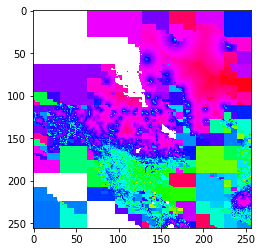

CPU times: user 480 ms, sys: 199 ms, total: 679 ms
Wall time: 563 ms


In [34]:
%%time

dat = hgmm.tiles(f, 1, 1, 0)
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.log(dat), cmap='hsv')
plt.show()

In [32]:
%%time

# server.tiles(ts.uuid, 0,0,0)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [33]:
import higlass_jupyter as hiju
import hgflask.client as hgc

conf = hgc.ViewConf([
    hgc.View([
        hgc.Track(track_type='top-axis', position='top'),
        hgc.Track(track_type='left-axis', position='left'),
        hgc.Track(track_type='heatmap', position='center',
                 tileset_uuid=ts.uuid,
                  api_url=server.api_address,
                  height=250),

    ])
])

hiju.HiGlassDisplay(viewconf=conf.to_json())


track.position top
track.position left
track.position center


HiGlassDisplay(viewconf={'editable': True, 'views': [{'uid': 'Td1XPU6pTHG76juCPA6z7w', 'tracks': {'top': [{'ty…